In [142]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

In [143]:
# Import Data
data = pd.read_csv('train.dat', dtype=float, header=None).to_numpy(dtype='float')

# Pre-process data into mean and standard deviation
means = np.mean(data, axis=1)
stds = np.std(data, axis=1)
mean_std = np.column_stack((means, stds))

# Testing PCA 
# pca_model = PCA(n_components=2)
# mean_std = pca_model.fit_transform(data)

In [144]:
# Use DBSCAN model
dbscan_model = DBSCAN(eps=5, min_samples=18)
dbres = dbscan_model.fit_predict(mean_std)

# Remove outliers
outliers_removed = []
for i in range(len(dbres)):
    if dbres[i] != -1:
        outliers_removed.append(mean_std[i])
        
# Debugging num outliers removed
print('Original data:', len(mean_std))
print('Outliers removed:', len(mean_std)-len(outliers_removed))
print('New length:', len(outliers_removed))

Original data: 11500
Outliers removed: 2635
New length: 8865


In [145]:
# Run through agglomerative clustering
model = AgglomerativeClustering(n_clusters=115)
clusters = model.fit_predict(outliers_removed)

In [146]:
# Cluster = -1 for outliers
results = []
for i in range(len(dbres)):
    if dbres[i] == -1:
        results.append(-1)
    else:
        results.append(clusters[0])
        clusters = np.delete(clusters, 0)
        
results = np.array(results)

In [147]:
# Add clusters for outliers
outliers = np.where(results == -1)[0]
for point in outliers:
    # Find euclidian distances between points
    distances = np.argsort(euclidean_distances([mean_std[point]], mean_std).flatten())
    for i in distances:
        #For closest point, set to cluster
        cluster = results[i]
        if(cluster != -1 and distances[i] > 0):
            results[point] = cluster
            break

In [148]:
import matplotlib.pyplot as plt
import random

In [149]:
# Print size of each cluster for debugging
for i in range(115):
    print(i, ':', np.count_nonzero(results == i))

0 : 72
1 : 164
2 : 83
3 : 83
4 : 216
5 : 183
6 : 72
7 : 144
8 : 40
9 : 140
10 : 104
11 : 64
12 : 76
13 : 143
14 : 66
15 : 219
16 : 163
17 : 110
18 : 188
19 : 72
20 : 60
21 : 35
22 : 117
23 : 70
24 : 94
25 : 111
26 : 41
27 : 48
28 : 43
29 : 69
30 : 169
31 : 177
32 : 98
33 : 55
34 : 71
35 : 169
36 : 74
37 : 83
38 : 111
39 : 142
40 : 47
41 : 171
42 : 57
43 : 49
44 : 127
45 : 85
46 : 66
47 : 59
48 : 38
49 : 169
50 : 43
51 : 61
52 : 86
53 : 78
54 : 75
55 : 117
56 : 69
57 : 48
58 : 43
59 : 41
60 : 69
61 : 44
62 : 74
63 : 72
64 : 70
65 : 87
66 : 70
67 : 44
68 : 36
69 : 114
70 : 86
71 : 104
72 : 2050
73 : 42
74 : 79
75 : 36
76 : 66
77 : 88
78 : 58
79 : 77
80 : 47
81 : 81
82 : 44
83 : 61
84 : 61
85 : 61
86 : 76
87 : 72
88 : 34
89 : 71
90 : 67
91 : 90
92 : 133
93 : 152
94 : 113
95 : 76
96 : 110
97 : 79
98 : 42
99 : 64
100 : 67
101 : 50
102 : 78
103 : 36
104 : 59
105 : 24
106 : 79
107 : 101
108 : 45
109 : 54
110 : 81
111 : 39
112 : 26
113 : 49
114 : 44


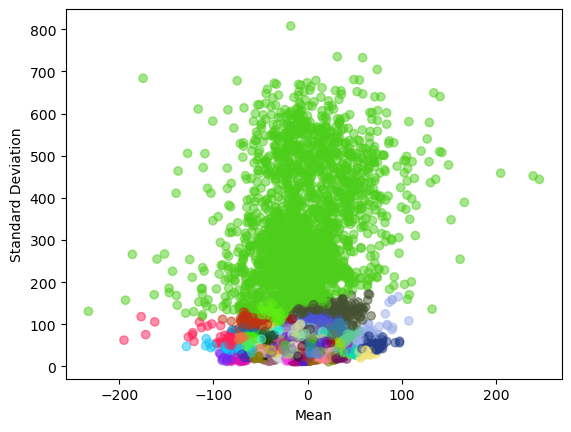

In [157]:
# Generate 115 random colors
hexadecimal = '0123456789ABCDEF'
color = ["#" + ''.join([random.choice(hexadecimal) for j in
range(6)]) for i in range(115)]

# Plot clusters on scatterplot
colors = [color[result] for result in results]
x, y = means, stds
plt.scatter(x, y, c=colors, alpha=0.5)
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.show()

In [156]:
# Testing with random numbers for baseline
# arr = np.append([],[])
# for i in range(1,115+1):
#     arr = np.append(arr, np.ones(100)*i)
# arr = arr.astype(int)
# np.random.shuffle(arr)
# results = arr

In [152]:
# Write to prediction.txt file
with open('prediction.txt', 'w') as f:
    for result in results:
        f.write(f"{result}\n")